# Data Cleaning

### Acknowledgement
> The original dataset belongs to Kaggle: [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) provided to redict house price using regression.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
cwd = os.getcwd()
for file in os.listdir(cwd):
    if file.endswith(".csv"):
        print (file) 

clean_data.csv
kc_house_data.csv


### Import and Summarize

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.iloc[:,1:].describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

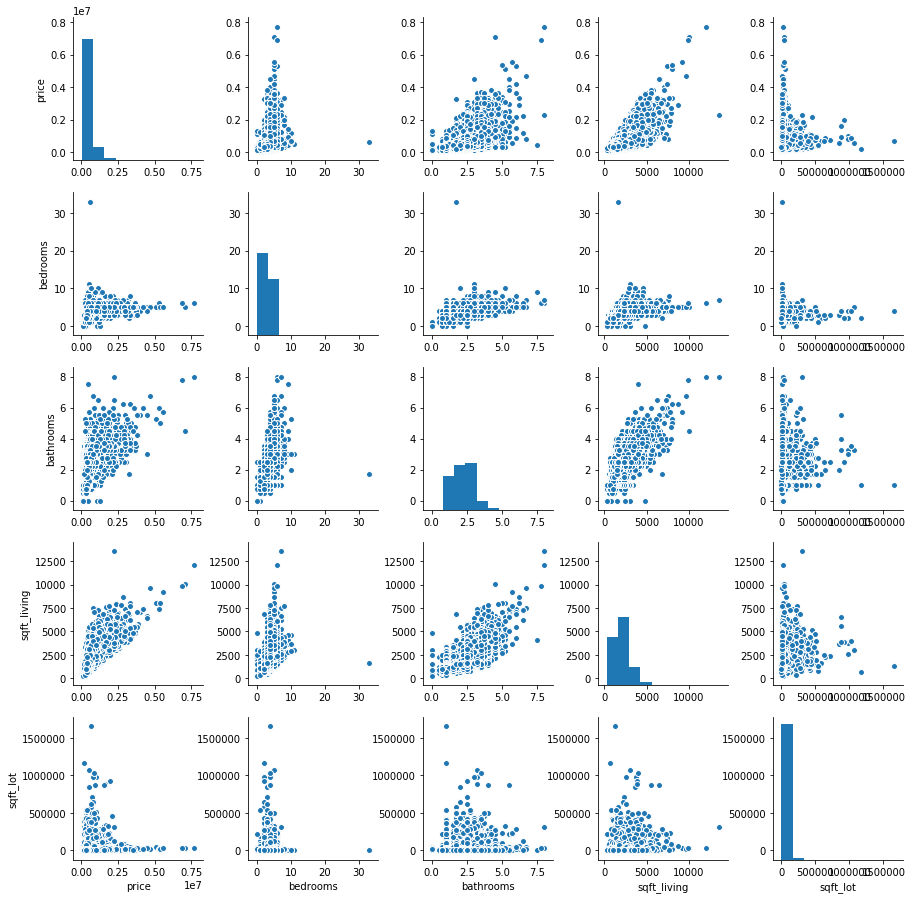

In [5]:
sns.pairplot(data.iloc[:,1:7]);

## Filter noise in 'bedrooms', Transform 'price' & 'sqrt_lot'

In [6]:
data[data['bedrooms']>15]

id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
15870         1620      6000     1.0           0     0     ...          7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]

In [7]:
data['sqft_lot'] = data['sqft_lot'].apply(np.log)

In [8]:
data['price'] = data['price'].apply(np.log)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


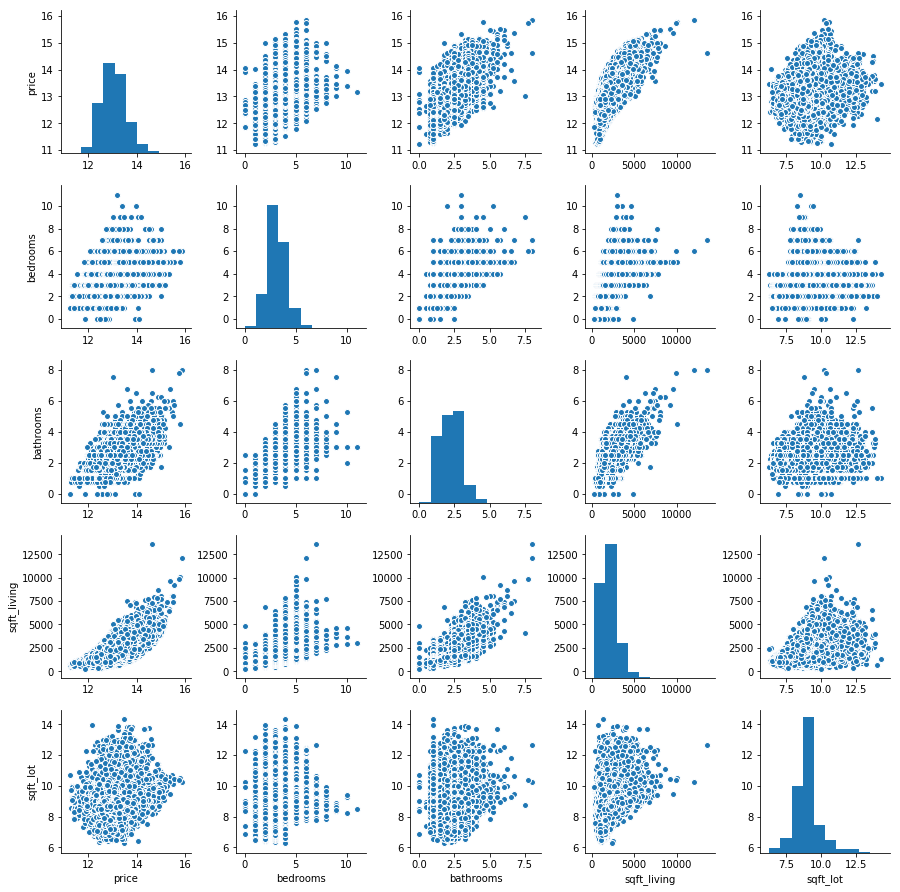

In [10]:
sns.pairplot(data.drop([15870]).iloc[:,1:7]); 

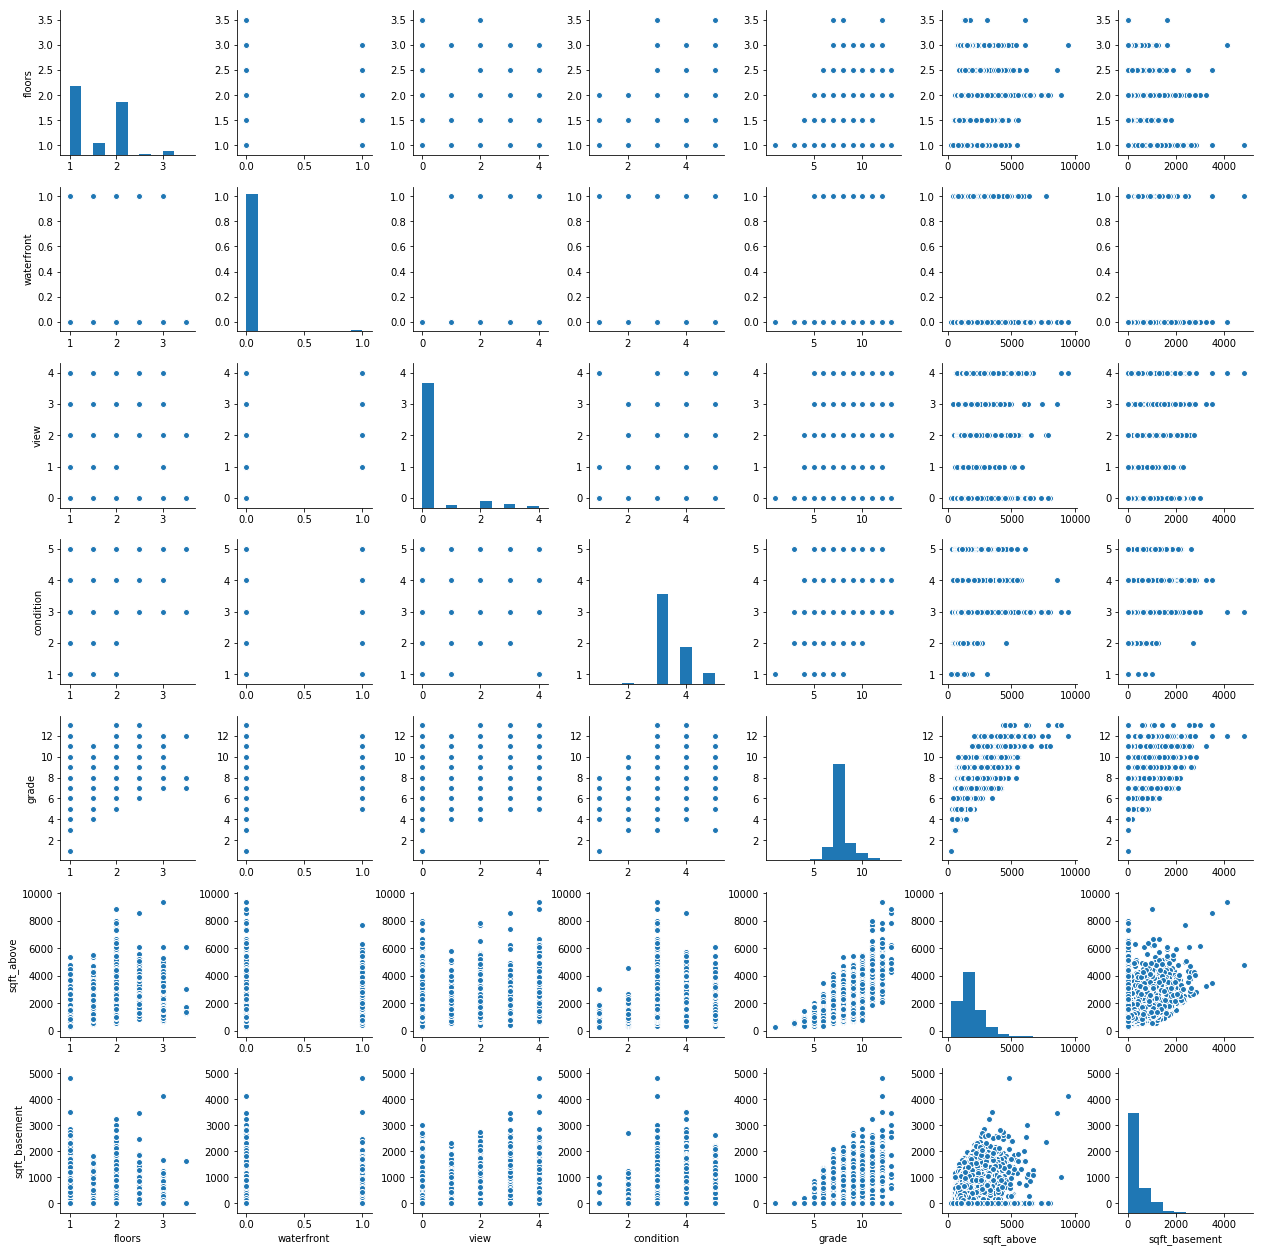

In [11]:
sns.pairplot(data.drop([15870]).iloc[:,7:14]); 

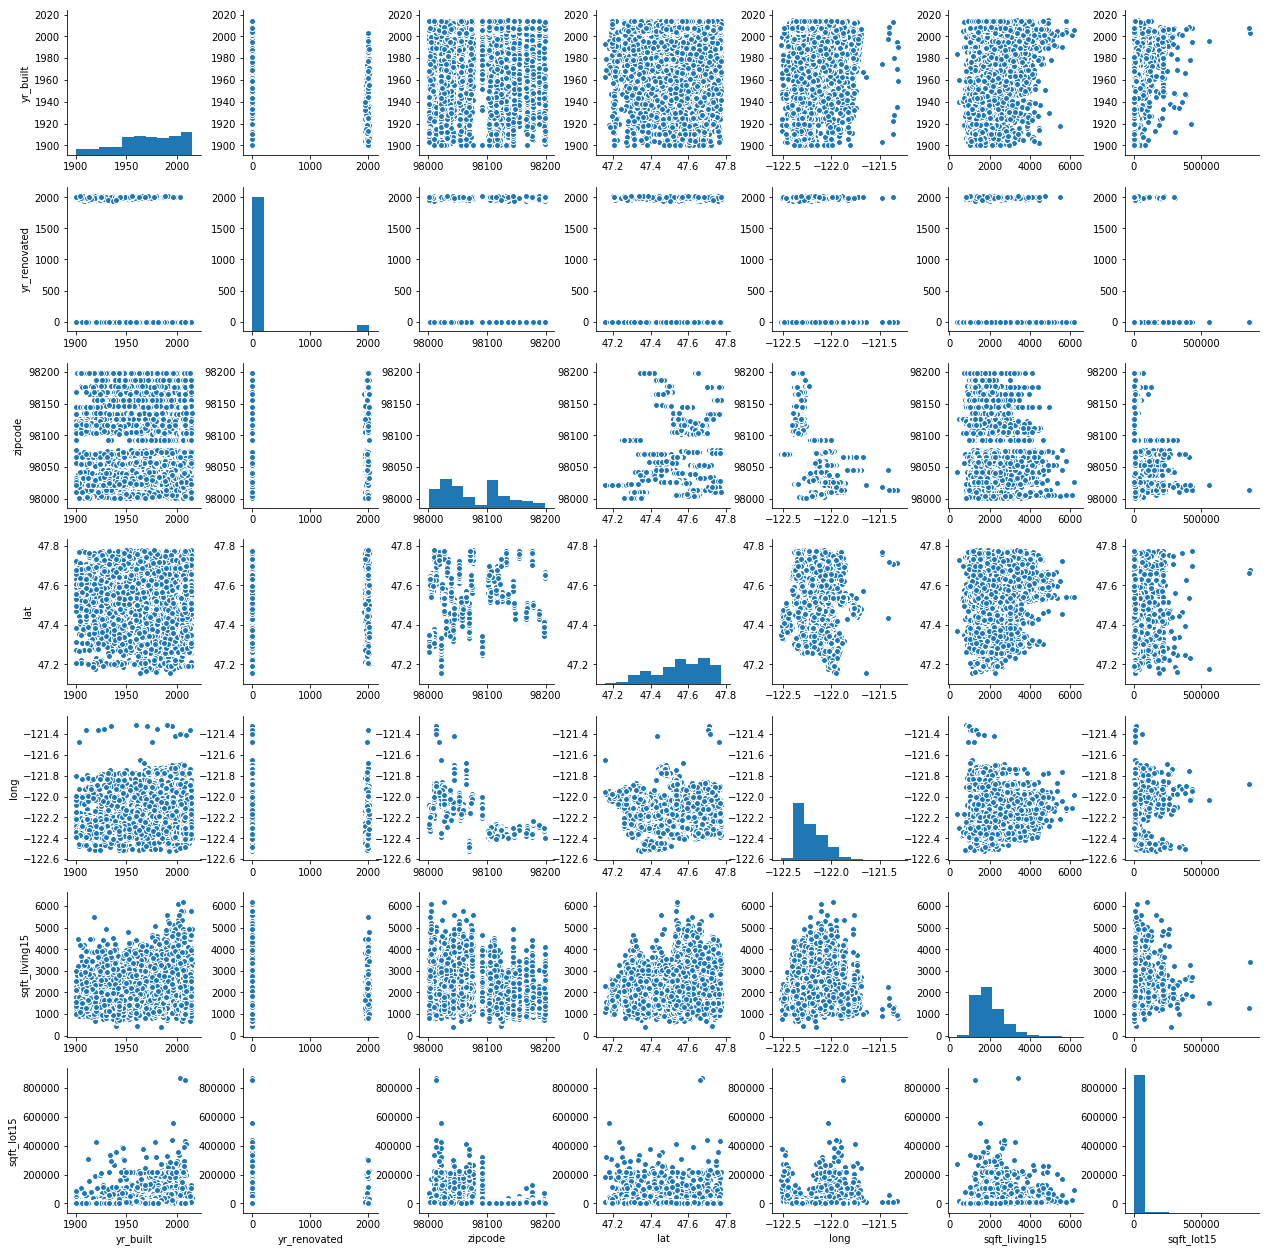

In [12]:
sns.pairplot(data.drop([15870]).iloc[:,14:]); 

In [13]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else x)

In [14]:
data['sqft_lot15'] = data['sqft_lot15'].apply(np.log)

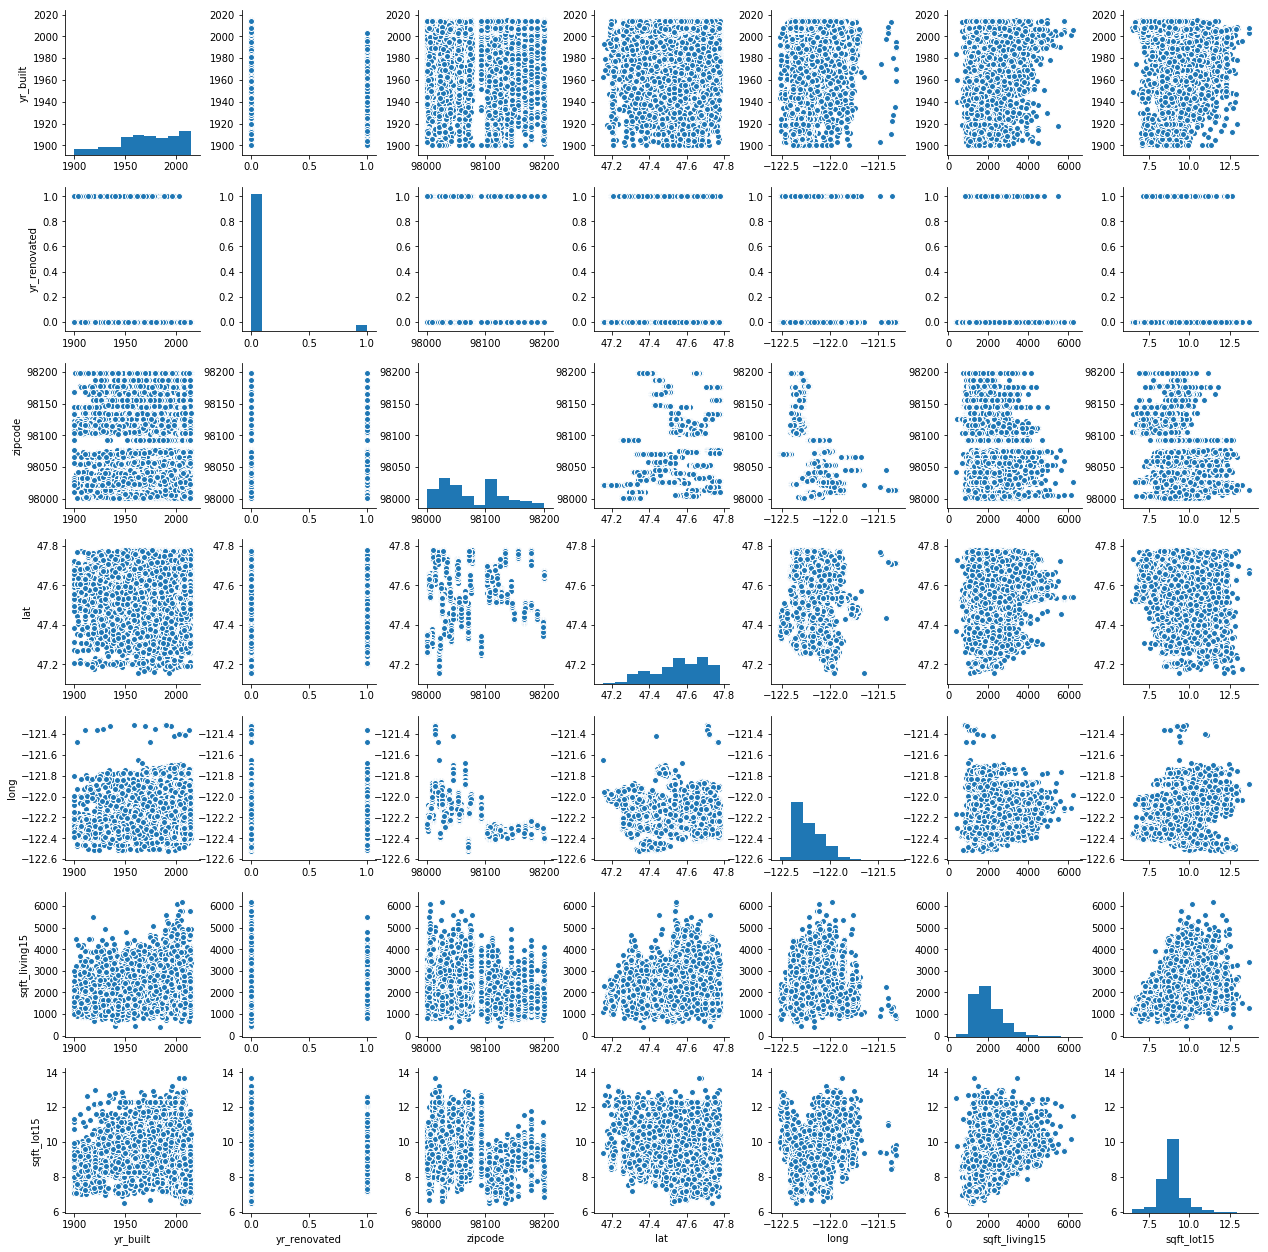

In [15]:
sns.pairplot(data.drop([15870]).iloc[:,14:]); 

In [16]:
data = data.iloc[:,1:]

In [17]:
data.drop([15870], inplace=True)

In [18]:
data['year'] = data.date.apply(lambda x : x[0:4])

In [19]:
data['month'] = data.date.apply(lambda x : x[4:6])

In [20]:
data.drop('date', axis=1, inplace=True)

In [21]:
data.reset_index(drop=True, inplace=True)

In [22]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  12.309982         3       1.00         1180  8.639411     1.0           0   
1  13.195614         3       2.25         2570  8.887653     2.0           0   
2  12.100712         2       1.00          770  9.210340     1.0           0   
3  13.311329         4       3.00         1960  8.517193     1.0           0   
4  13.142166         3       2.00         1680  8.997147     1.0           0   

   view  condition  grade  ...   sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...               0      1955             0   
1     0          3      7  ...             400      1951             1   
2     0          3      6  ...               0      1933             0   
3     0          5      7  ...             910      1965             0   
4     0          3      8  ...               0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year month  
0    98178  47.5112 -122.257           1340    8.639411  2014    10  
1    98125  47.7210 -122.319           1690    8.941022  2014    12  
2    98028  47.7379 -122.233           2720    8.994917  2015    02  
3    98136  47.5208 -122.393           1360    8.517193  2014    12  
4    98074  47.6168 -122.045           1800    8.923058  2015    02  

[5 rows x 21 columns]

In [24]:
data.to_csv("clean_data.csv")

## Fin!